In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
data = pd.read_csv('train.csv')

In [70]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [71]:
def init_params():
    W1 = np.random.rand(10, 784)-0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10,1)- 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(0, Z)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z): 
    return Z > 0

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2) 
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1= 1 / m * np.sum(dZ1) 
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [38]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    print_interval = 50
    for i in np.arange(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i % print_interval == 0):
            print("Iterations: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
              

In [80]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 1000, 0.10)

Iterations:  0
[0 0 2 ... 6 9 0] [7 4 7 ... 6 4 2]
0.13617073170731708
Iterations:  50
[2 0 7 ... 6 1 2] [7 4 7 ... 6 4 2]
0.3831707317073171
Iterations:  100
[4 4 7 ... 6 9 2] [7 4 7 ... 6 4 2]
0.5632195121951219
Iterations:  150
[4 4 7 ... 6 9 2] [7 4 7 ... 6 4 2]
0.6745365853658537
Iterations:  200
[4 4 7 ... 6 9 2] [7 4 7 ... 6 4 2]
0.7229756097560975
Iterations:  250
[4 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.7509756097560976
Iterations:  300
[4 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.771609756097561
Iterations:  350
[4 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.7880243902439025
Iterations:  400
[4 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.8011463414634147
Iterations:  450
[4 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.811609756097561
Iterations:  500
[7 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.8197073170731707
Iterations:  550
[7 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.826560975609756
Iterations:  600
[7 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.8323414634146341
Iterations:  650
[7 4 7 ... 6 4 2] [7 4 7 ... 6 4 2]
0.83724390243902

In [83]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, A2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


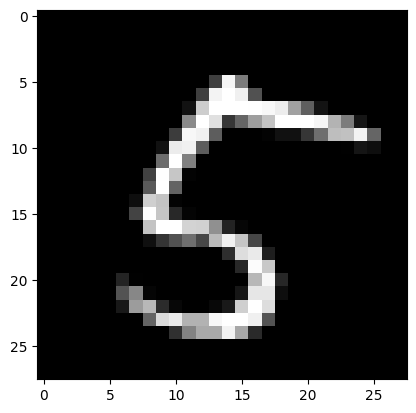

In [96]:
test_prediction(954, W1, b1, W2, b2)